In [ ]:
import sys
sys.path.insert(0, r'C:\Users\julia\OneDrive\Documents\ML Projects\Coffee-Price-Prediction\Ignore')
import pandas as pd
from config import *

In [ ]:
coffee_data = get_coffee_price()
coffee_data
df = pd.DataFrame(coffee_data['data'])
df.reset_index(inplace=True)
(df == ".").sum()

index      0
date       0
value    120
dtype: int64

In [ ]:
# Drop the last 120 rows because they contain null values
df = df.iloc[:-120]
df

,index,date,value
0,0,2024-12-01,344.118636363636
1,1,2024-11-01,304.952857142857
2,2,2024-10-01,276.777391304348
3,3,2024-09-01,278.760476190476
4,4,2024-08-01,261.437727272727
...,...,...,...
415,415,1990-05-01,92.0199890136719
416,416,1990-04-01,93.7300109863281
417,417,1990-03-01,93.9599914550781
418,418,1990-02-01,84.010009765625


In [ ]:
# Download data to a csv file. This way I don't have to call the API every time.

csv_file_path = "coffee_output_data.csv"
df.to_csv(csv_file_path, index=False)
print(f"DataFrame successfully exported to {csv_file_path}")

DataFrame successfully exported to coffee_output_data.csv


## Importing CSV File

In [ ]:
# Import csv file

import pandas as pd
df = pd.read_csv(r"C:\Users\julia\OneDrive\Documents\ML Projects\Coffee-Price-Prediction\coffee_output_data.csv")
df = df.iloc[::-1].reset_index(drop=True)   # Change order of the data
df

,index,date,value
0,419,1990-01-01,75.829987
1,418,1990-02-01,84.010010
2,417,1990-03-01,93.959991
3,416,1990-04-01,93.730011
4,415,1990-05-01,92.019989
...,...,...,...
415,4,2024-08-01,261.437727
416,3,2024-09-01,278.760476
417,2,2024-10-01,276.777391
418,1,2024-11-01,304.952857


In [ ]:
# Delete duplicate index column
df.drop('index', axis=1)

,date,value
0,1990-01-01,75.829987
1,1990-02-01,84.010010
2,1990-03-01,93.959991
3,1990-04-01,93.730011
4,1990-05-01,92.019989
...,...,...
415,2024-08-01,261.437727
416,2024-09-01,278.760476
417,2024-10-01,276.777391
418,2024-11-01,304.952857


In [ ]:
# Create function to convert values from cents per pound to dollars per pound

def dollar_per_pound(value):
    new_value = value * 0.01
    return round(new_value, 2)

In [ ]:
# Apply the function to values

df['new_values'] = df['value'].apply(dollar_per_pound)
df.drop('value', axis=1)

,index,date,new_values
0,419,1990-01-01,0.76
1,418,1990-02-01,0.84
2,417,1990-03-01,0.94
3,416,1990-04-01,0.94
4,415,1990-05-01,0.92
...,...,...,...
415,4,2024-08-01,2.61
416,3,2024-09-01,2.79
417,2,2024-10-01,2.77
418,1,2024-11-01,3.05


## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
df = df.drop(columns = ['index', 'value'])
df

,date,new_values
0,1990-01-01,0.76
1,1990-02-01,0.84
2,1990-03-01,0.94
3,1990-04-01,0.94
4,1990-05-01,0.92
...,...,...
415,2024-08-01,2.61
416,2024-09-01,2.79
417,2024-10-01,2.77
418,2024-11-01,3.05


In [11]:
df.describe()

,new_values
count,420.000000
mean,1.414381
std,0.590541
min,0.510000
25%,0.937500
50%,1.350000
75%,1.730000
max,3.440000


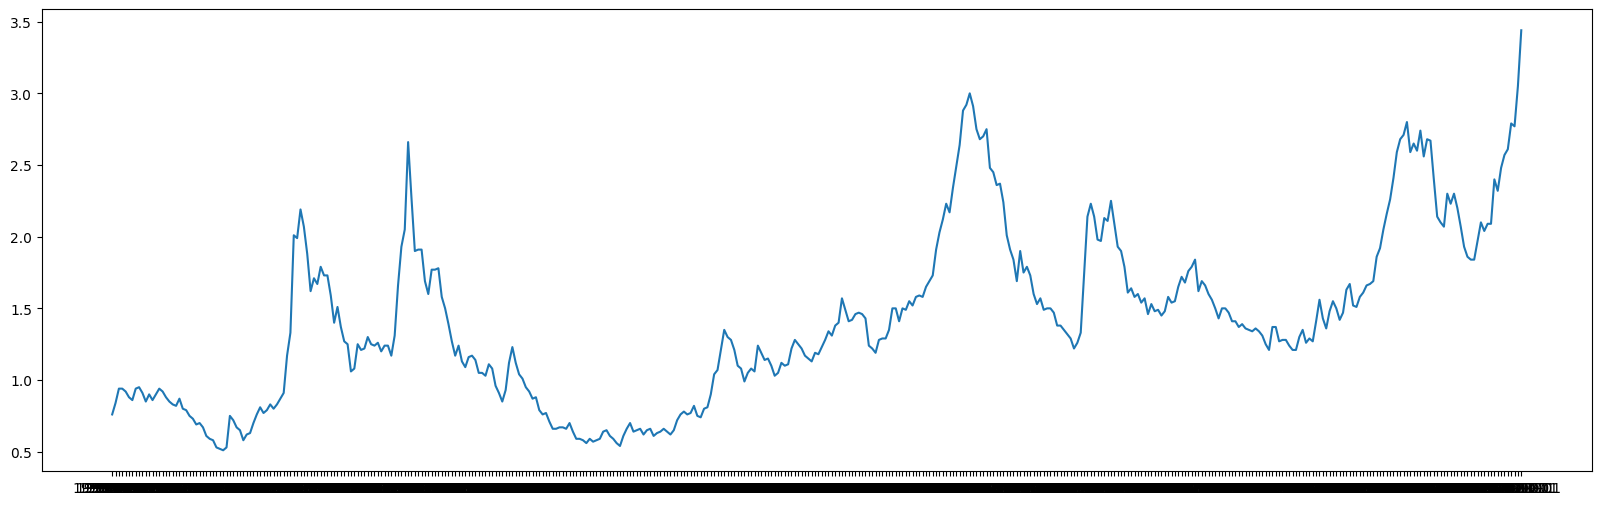

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df['date'], df['new_values'])

plt.show()

In [13]:
df.columns

Index(['date', 'new_values'], dtype='object')

In [ ]:
df_yearly = len(df) / 12
df_yearly

35.0

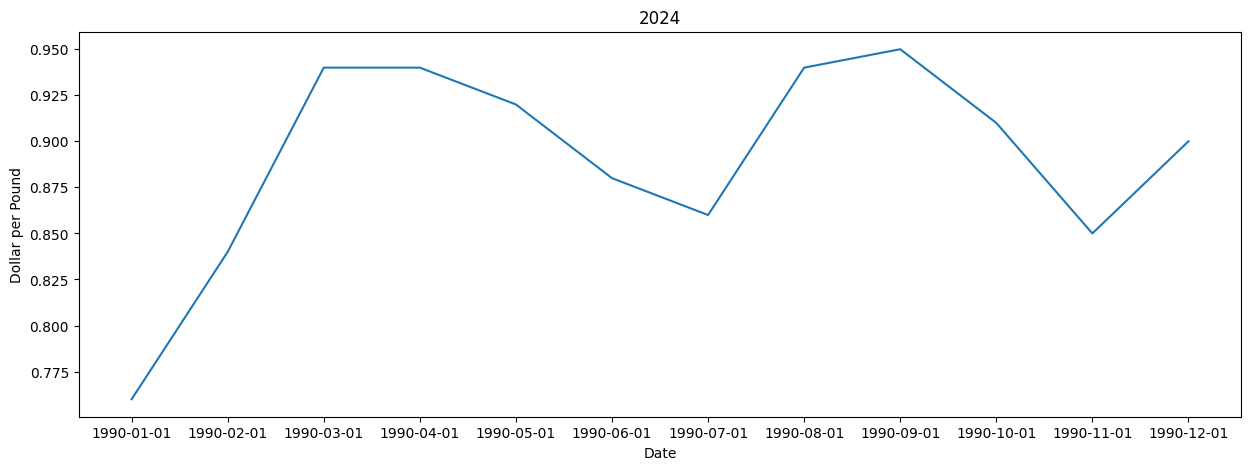

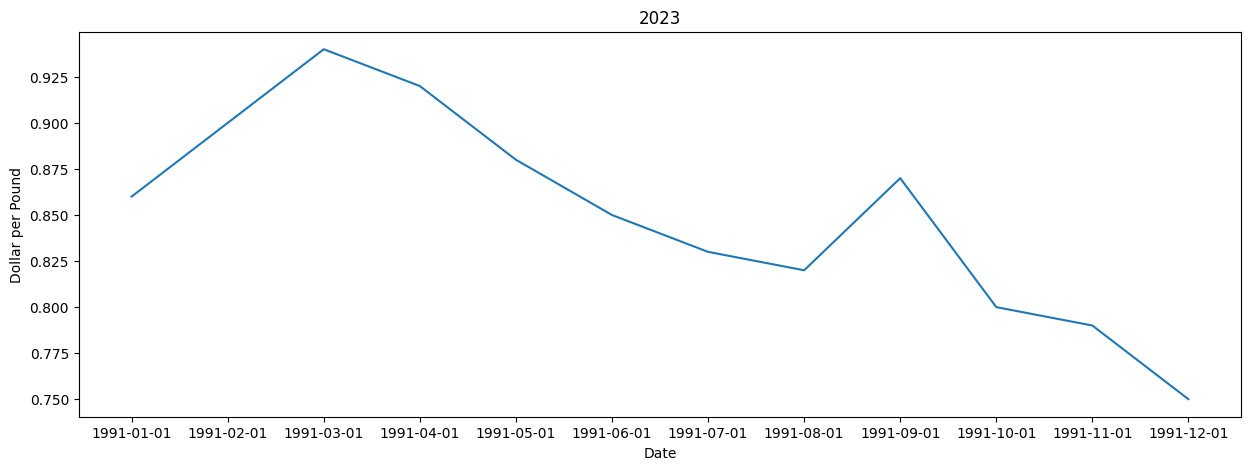

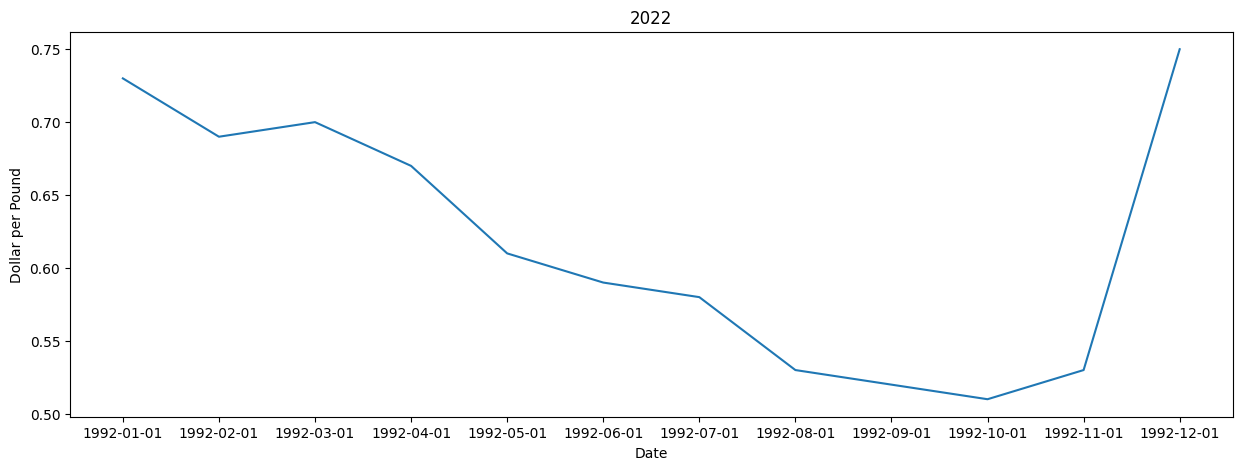

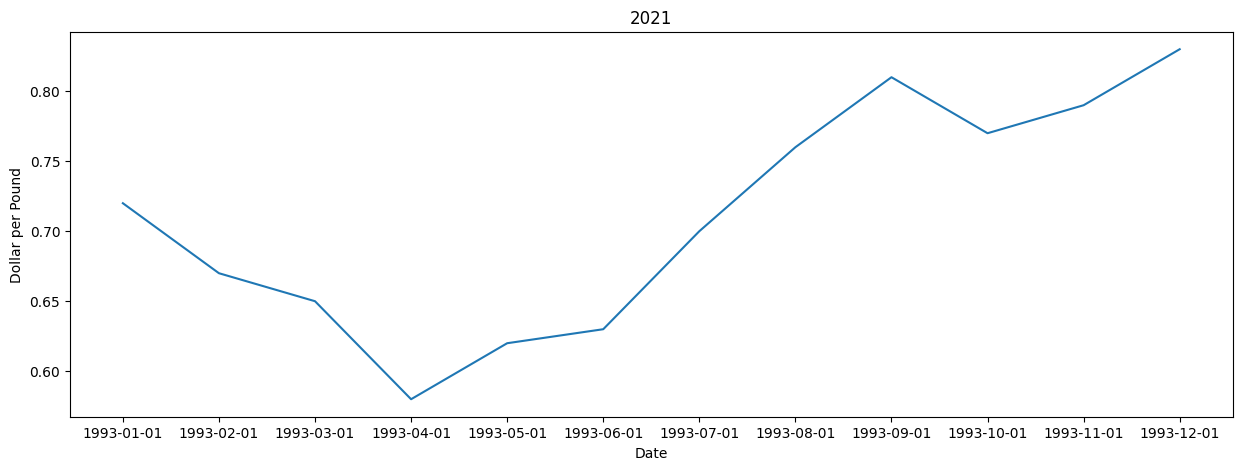

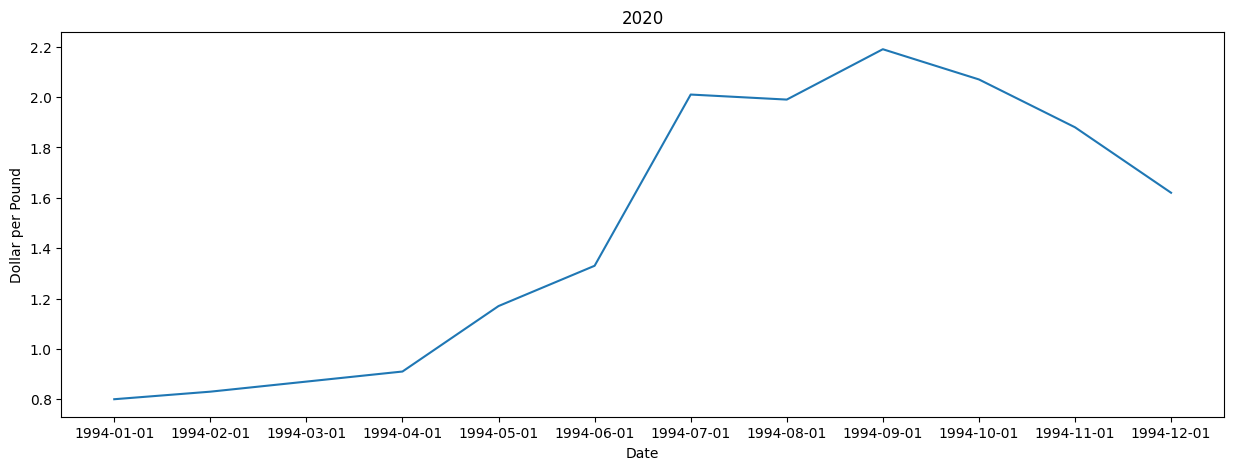

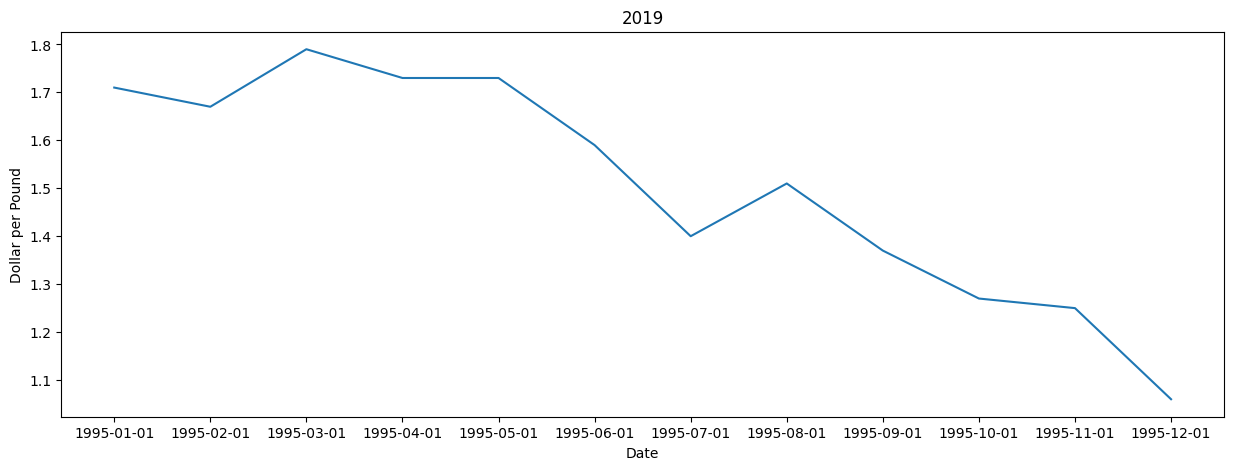

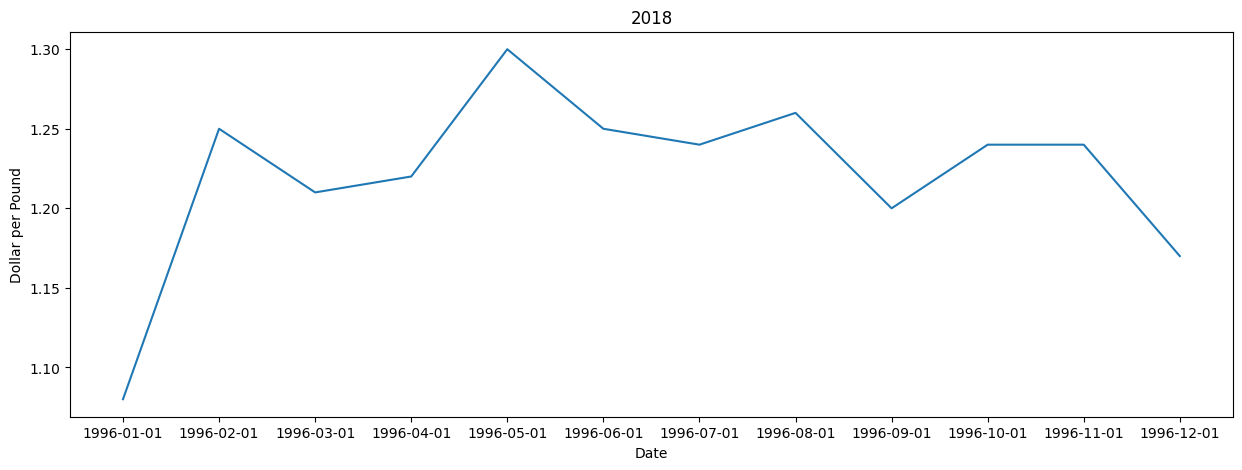

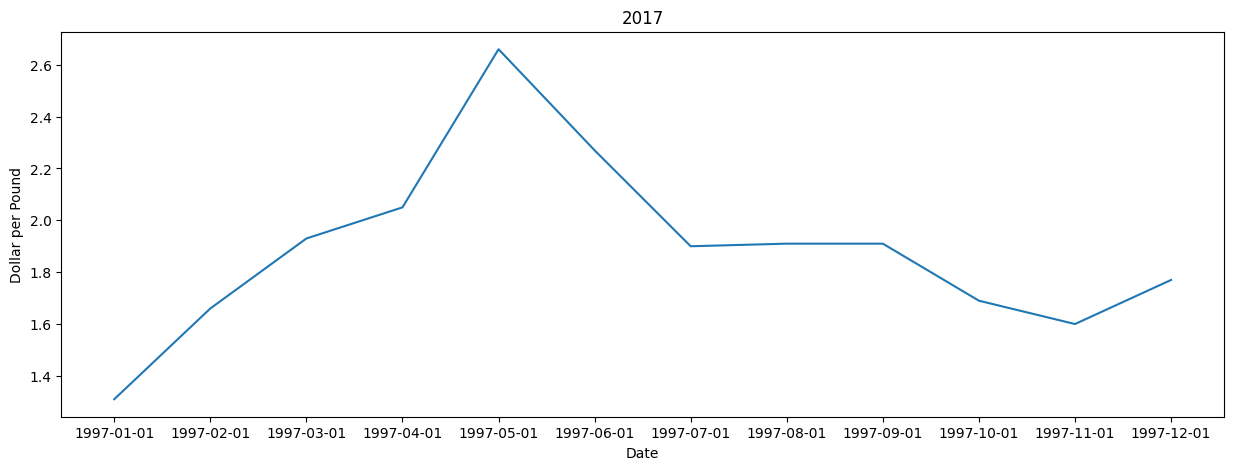

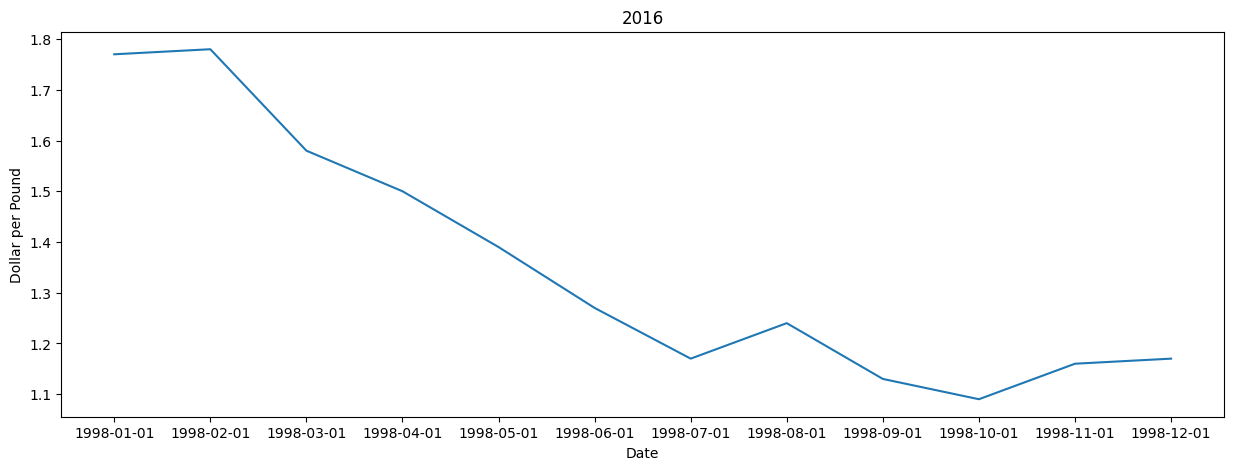

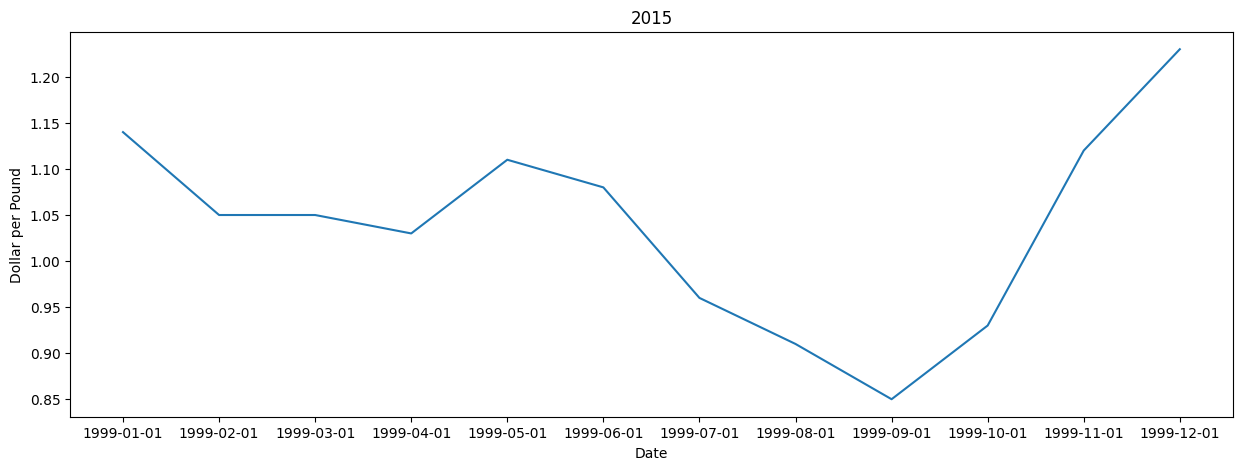

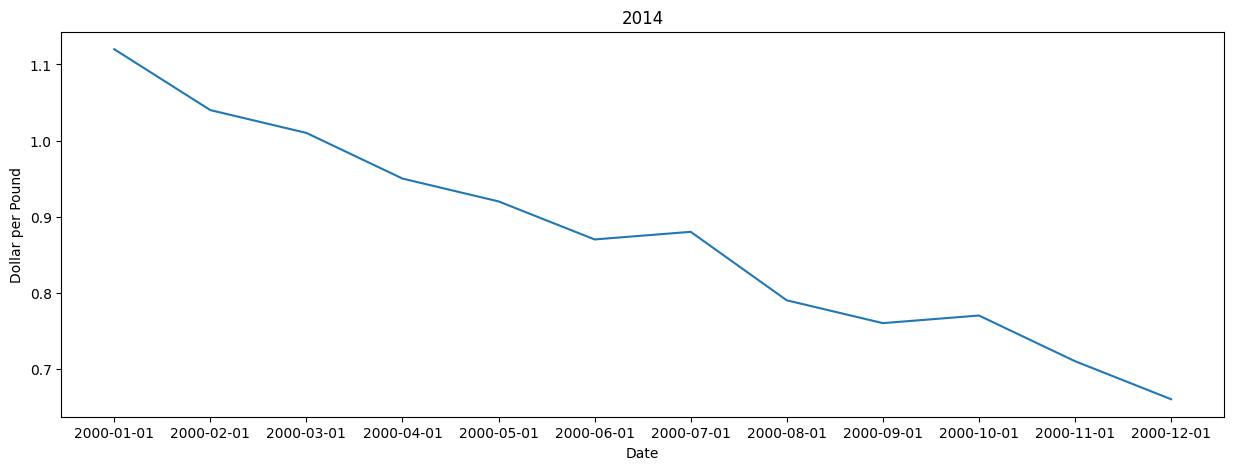

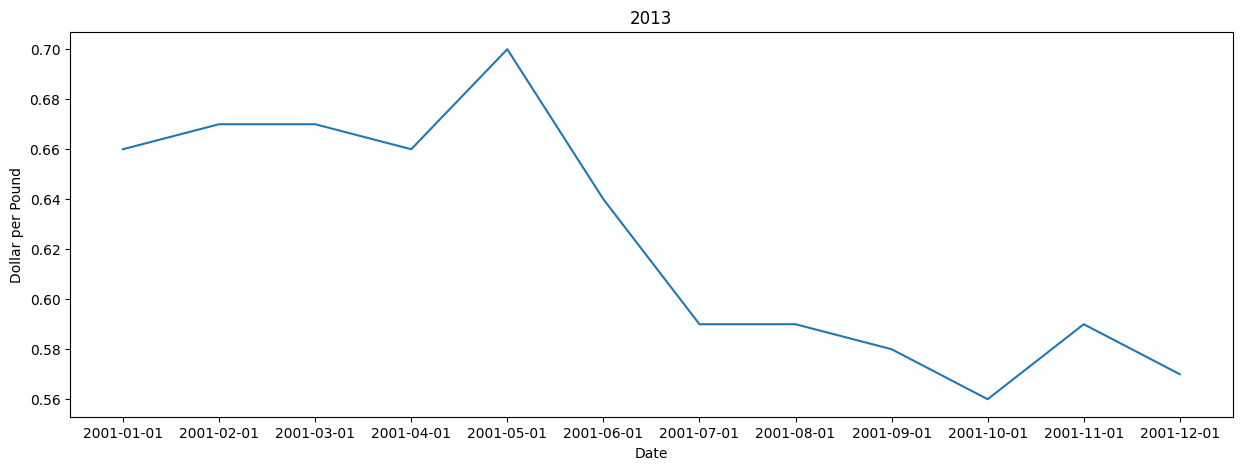

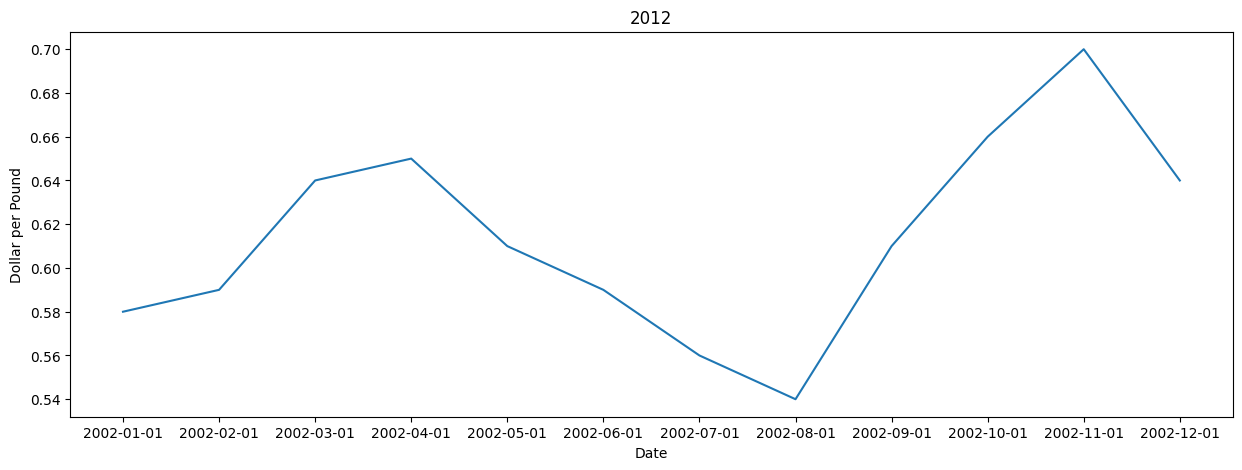

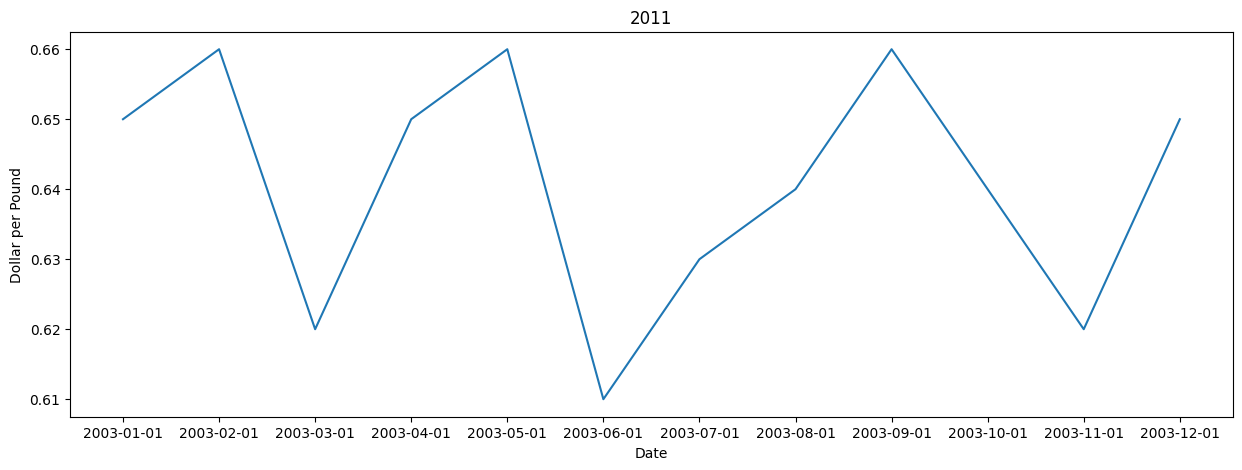

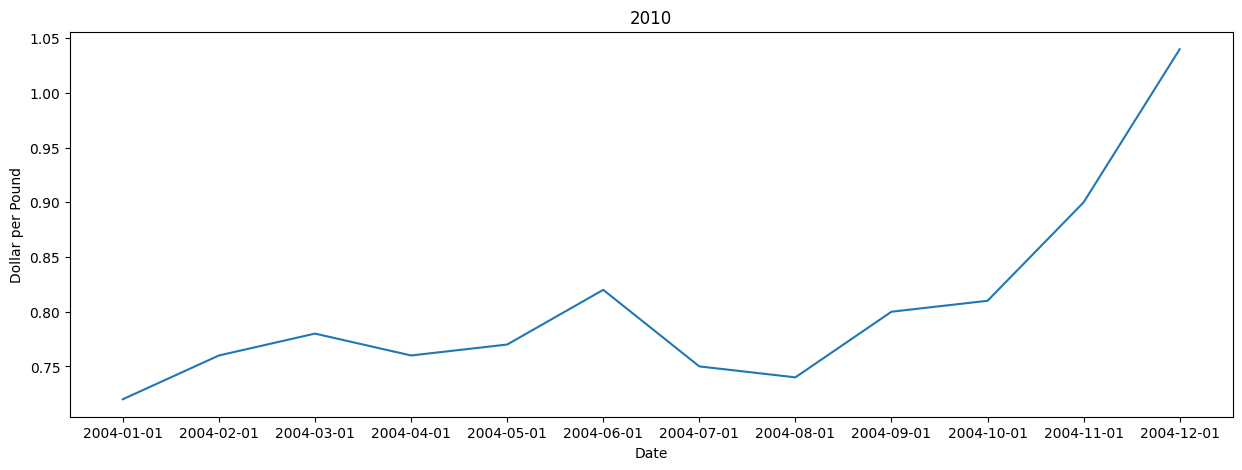

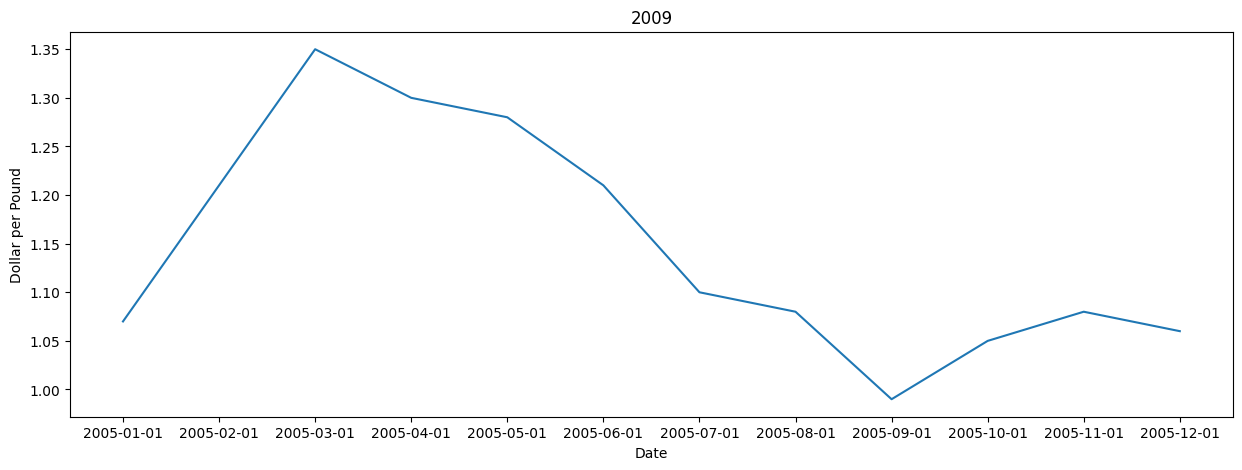

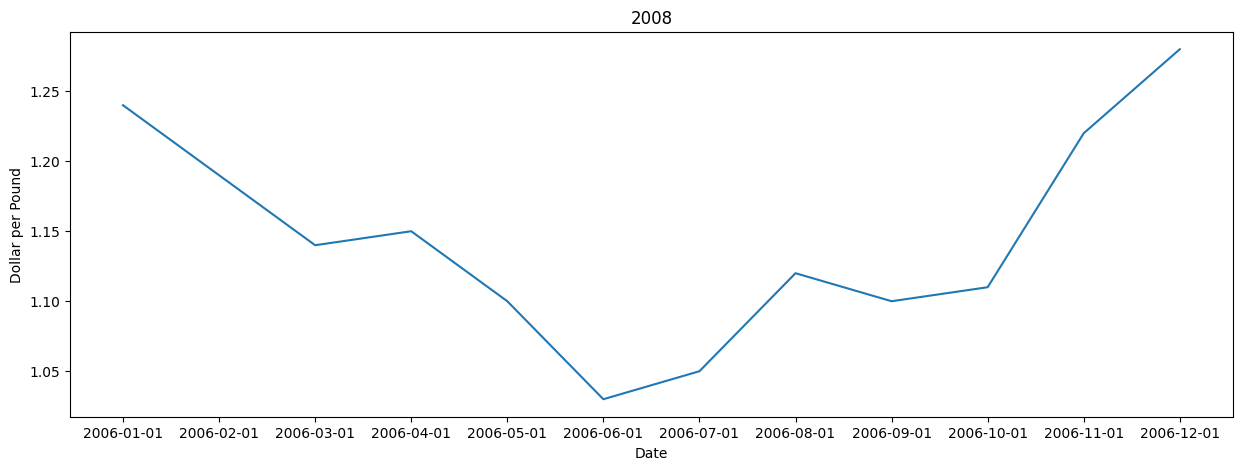

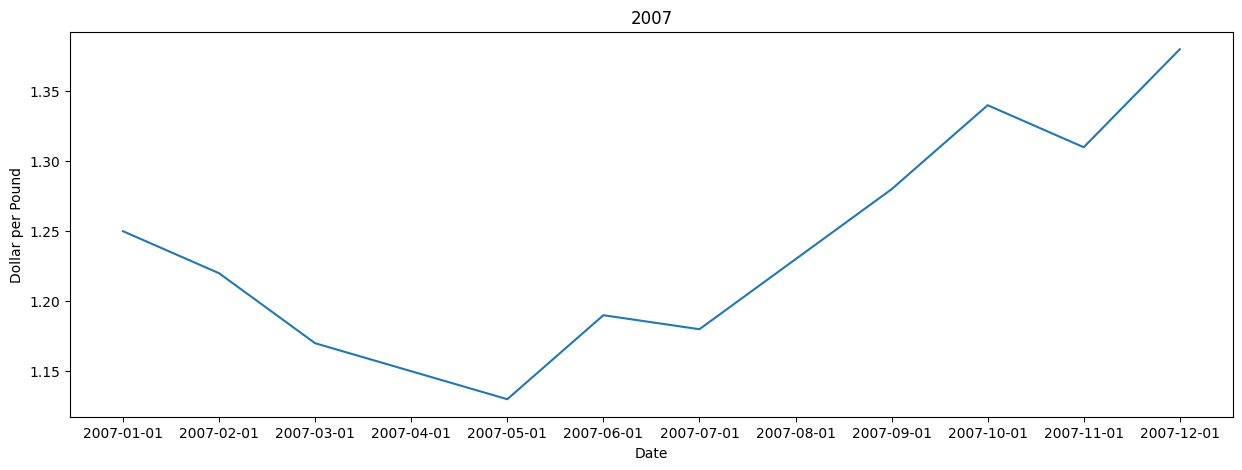

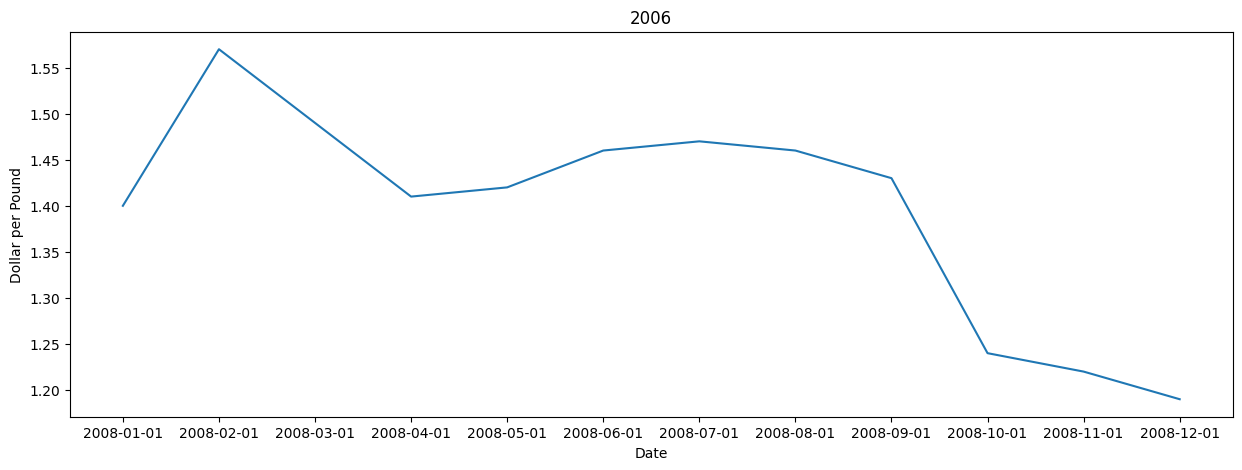

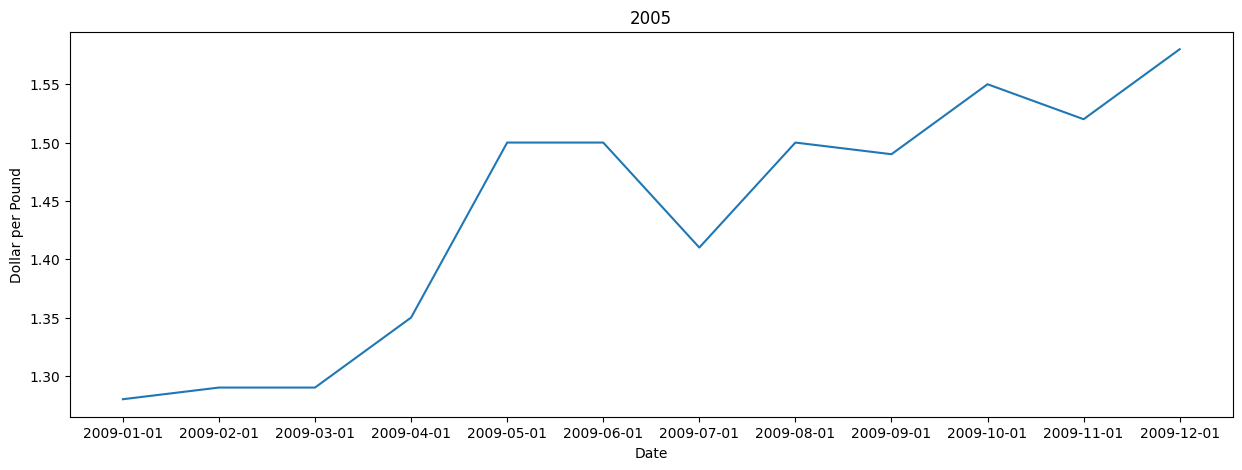

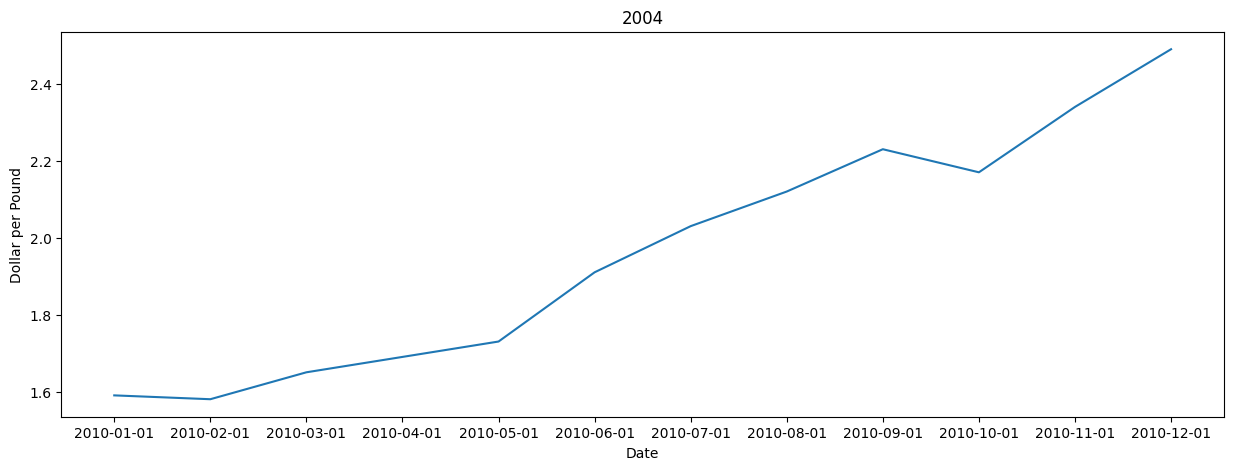

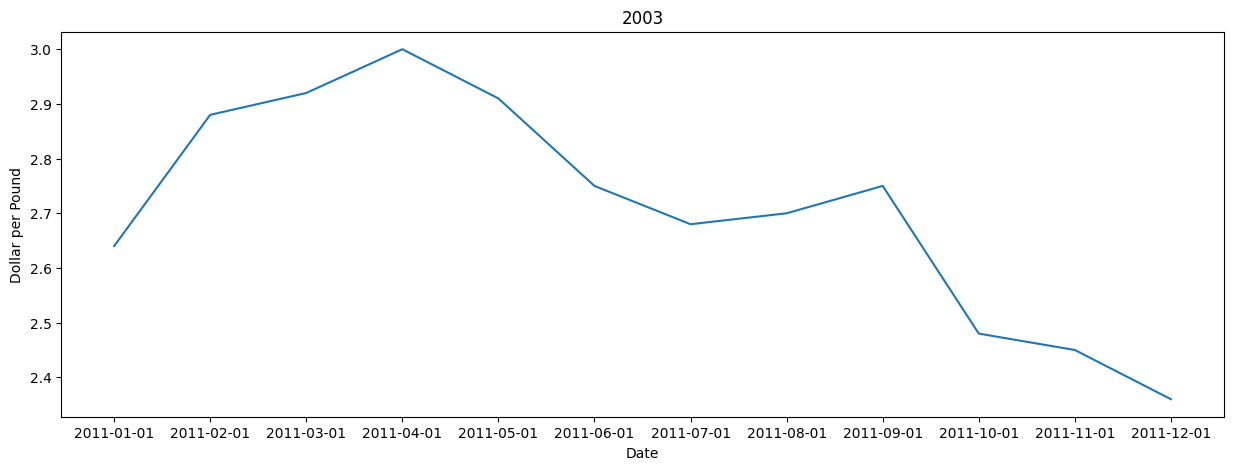

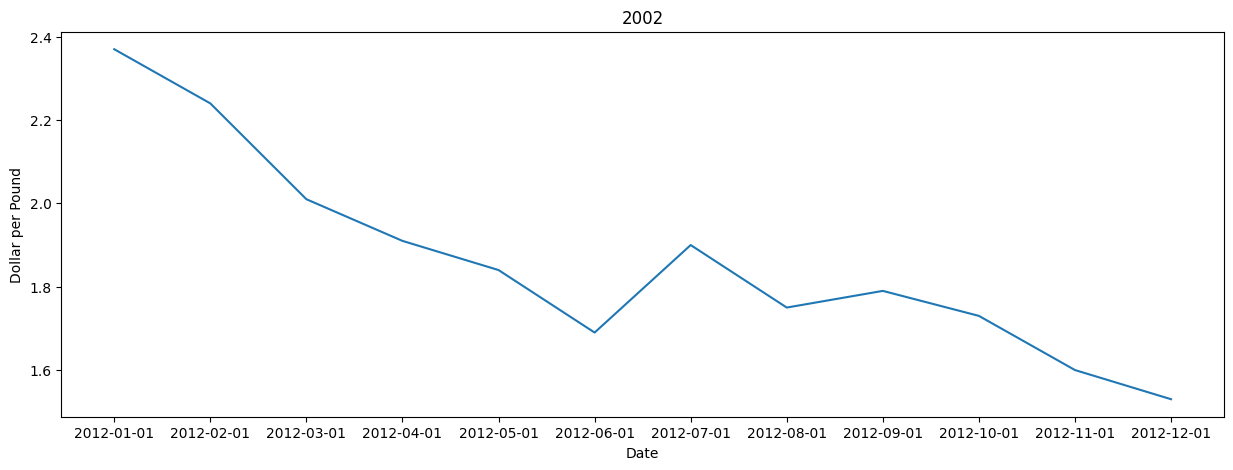

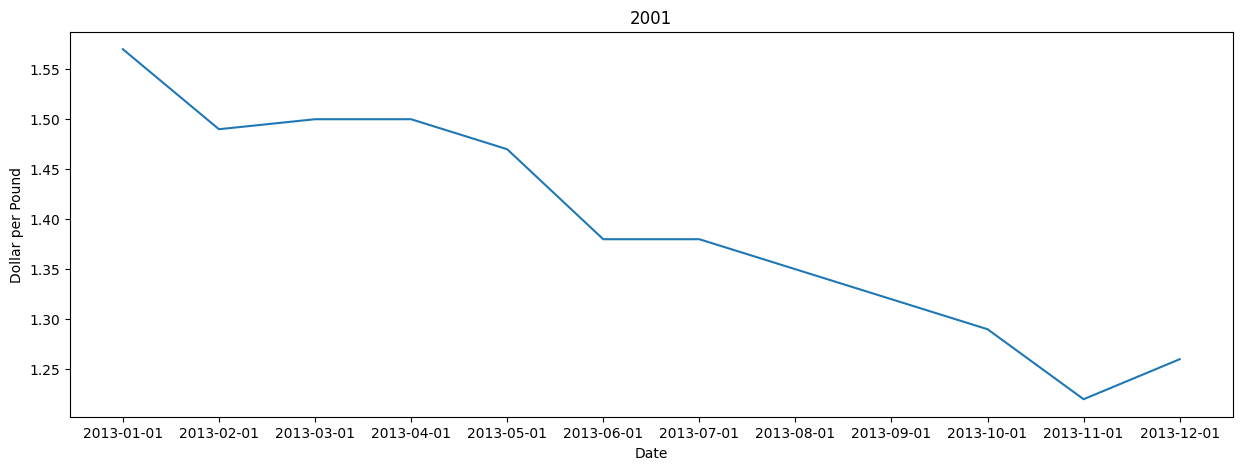

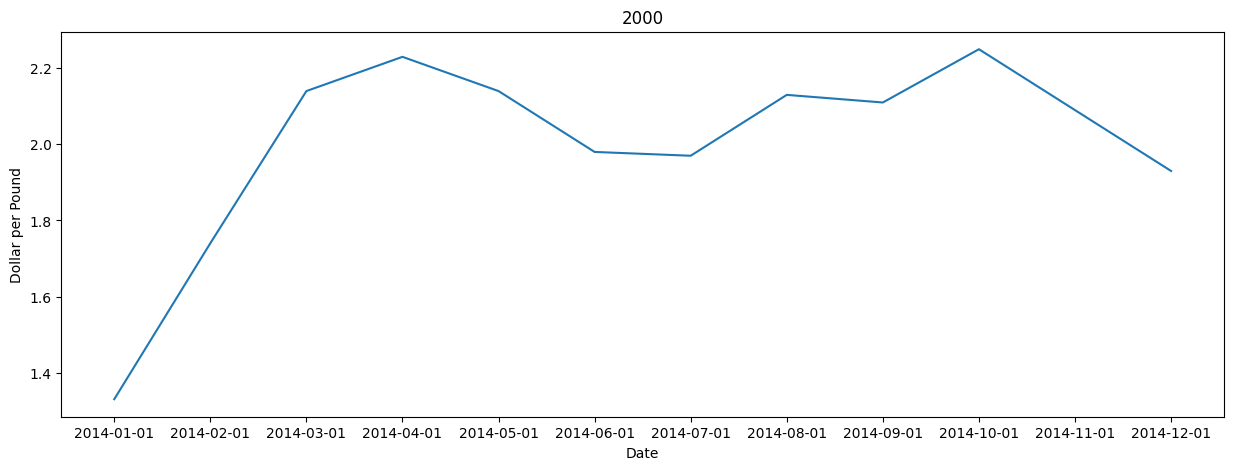

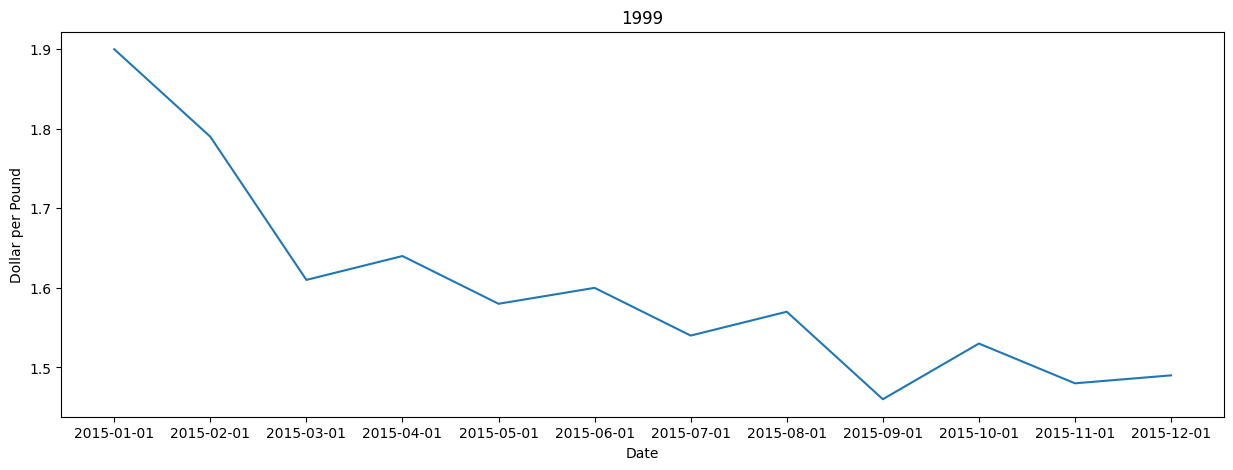

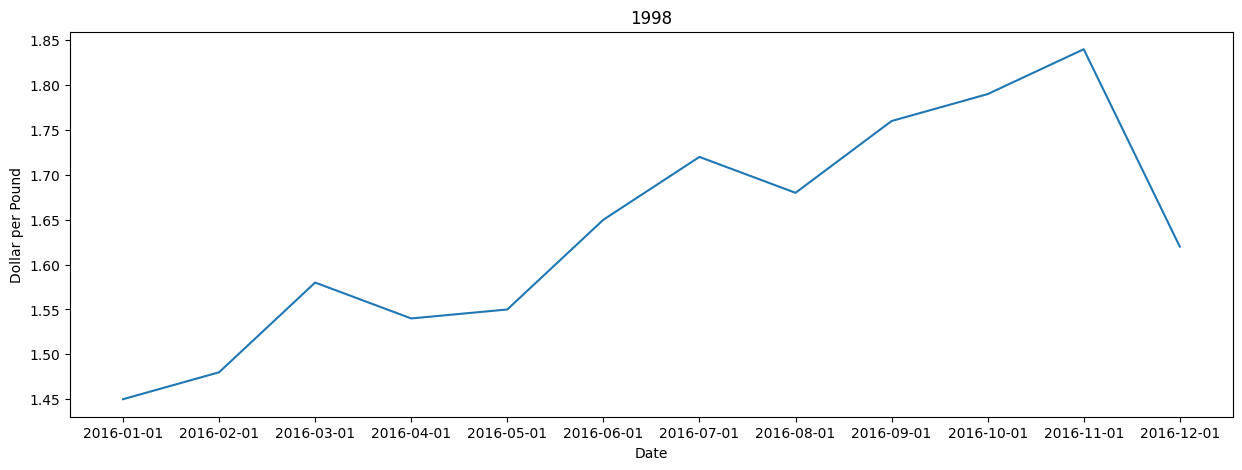

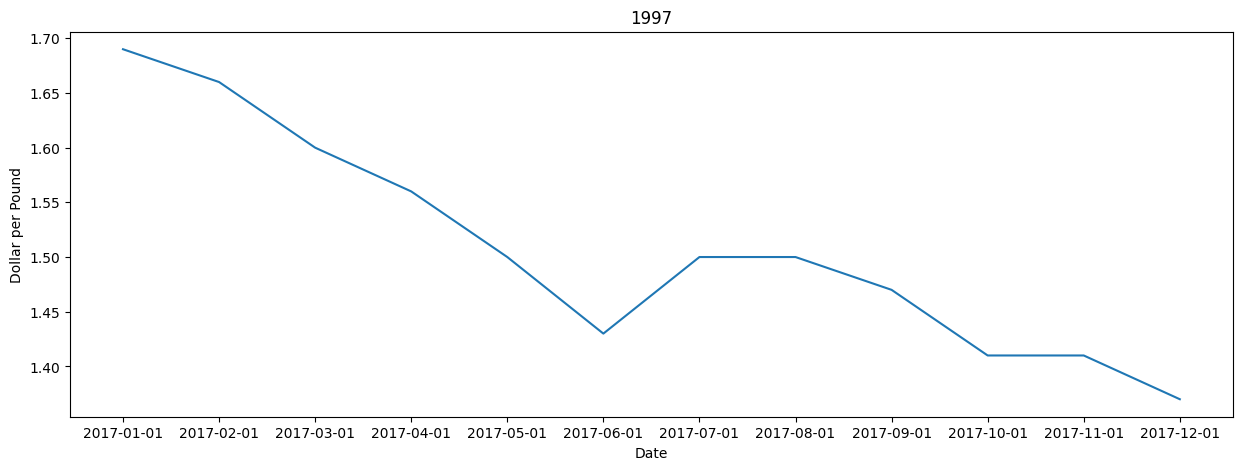

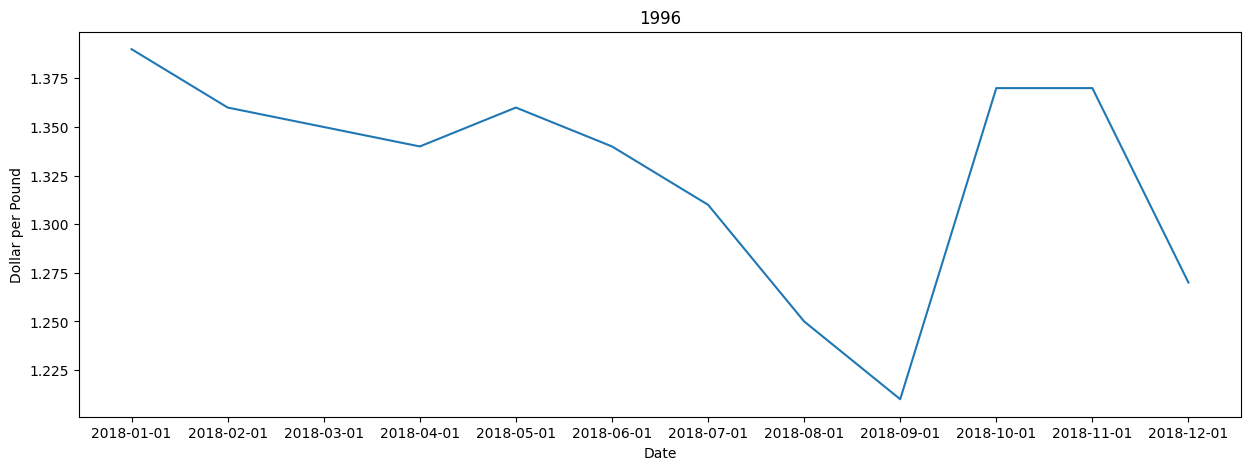

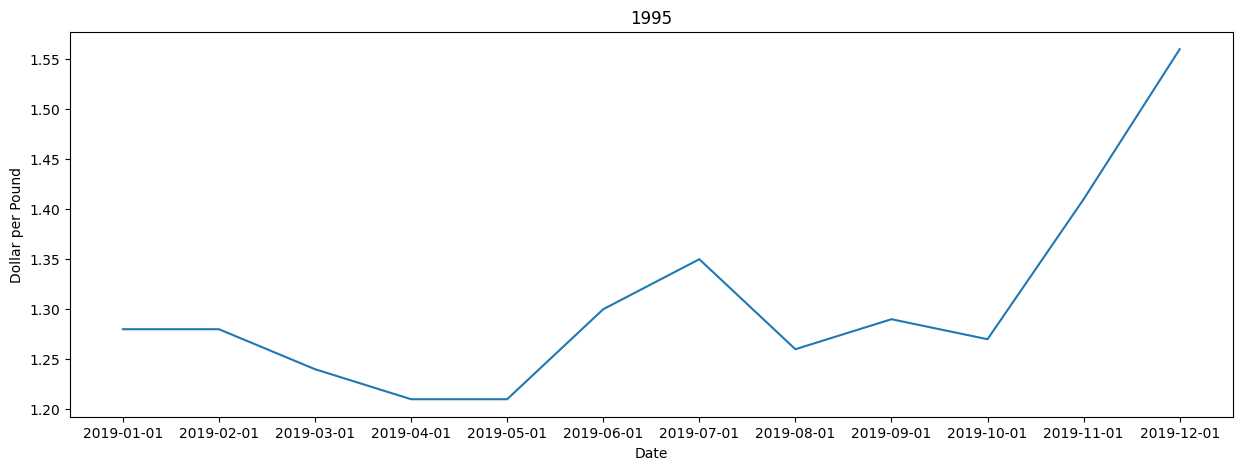

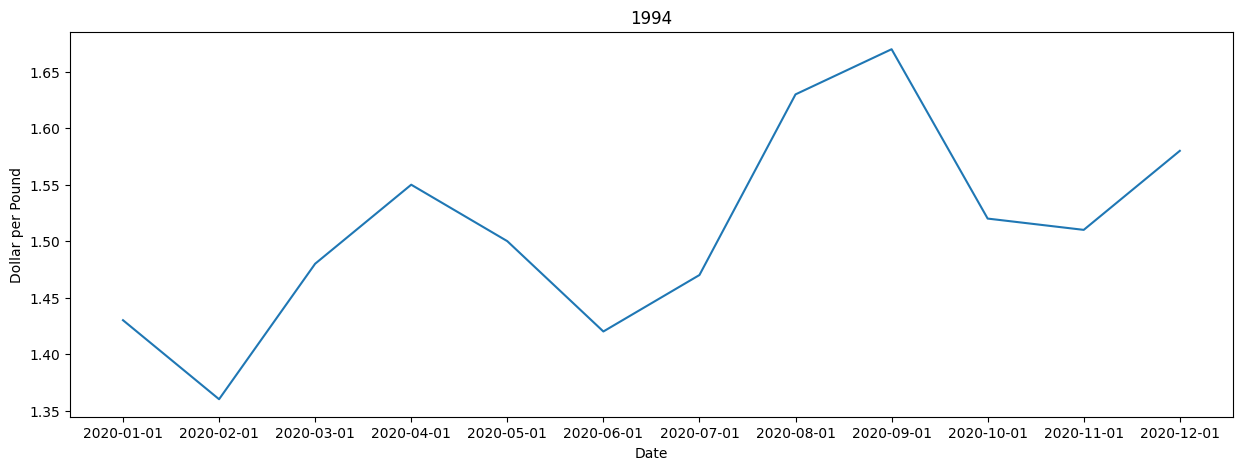

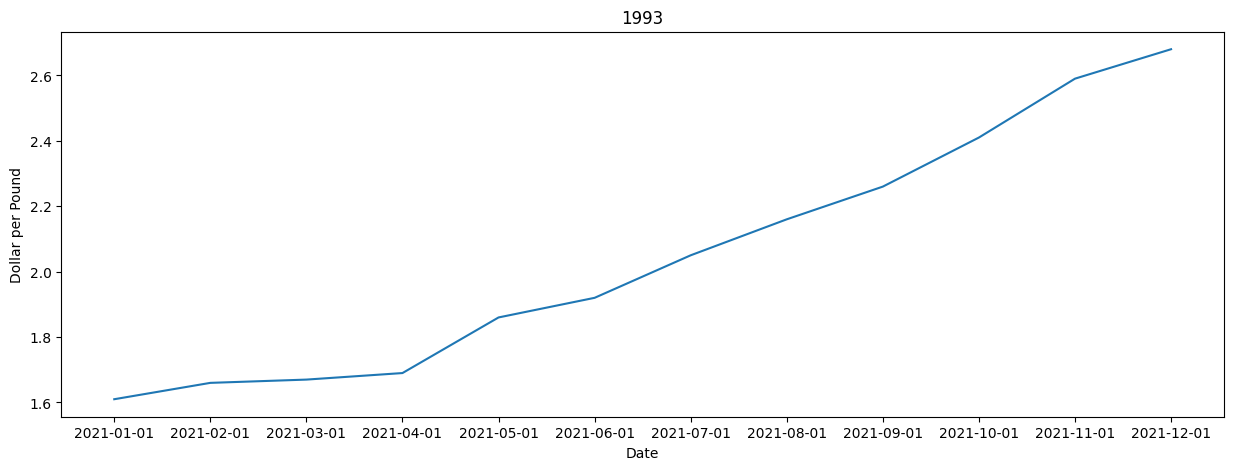

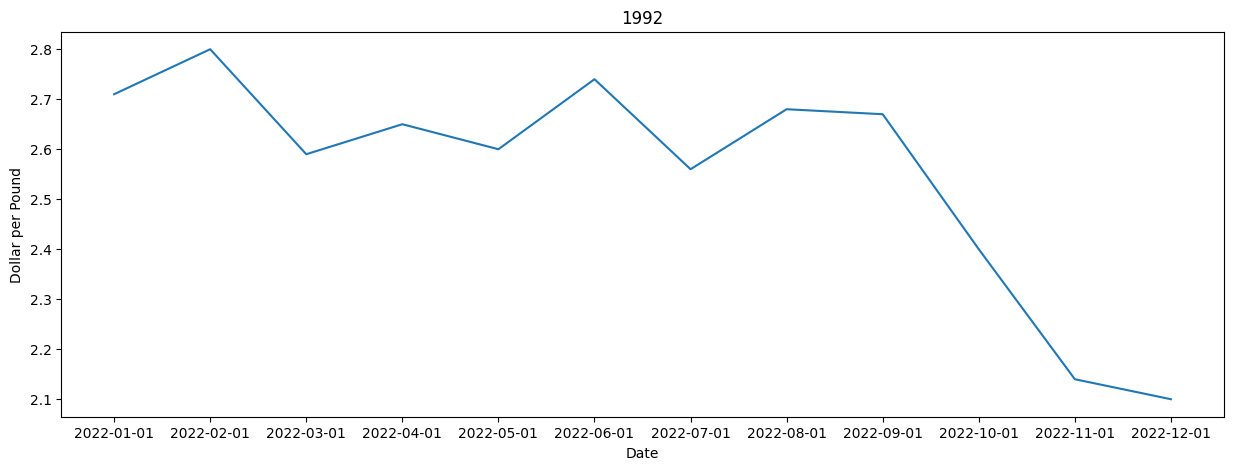

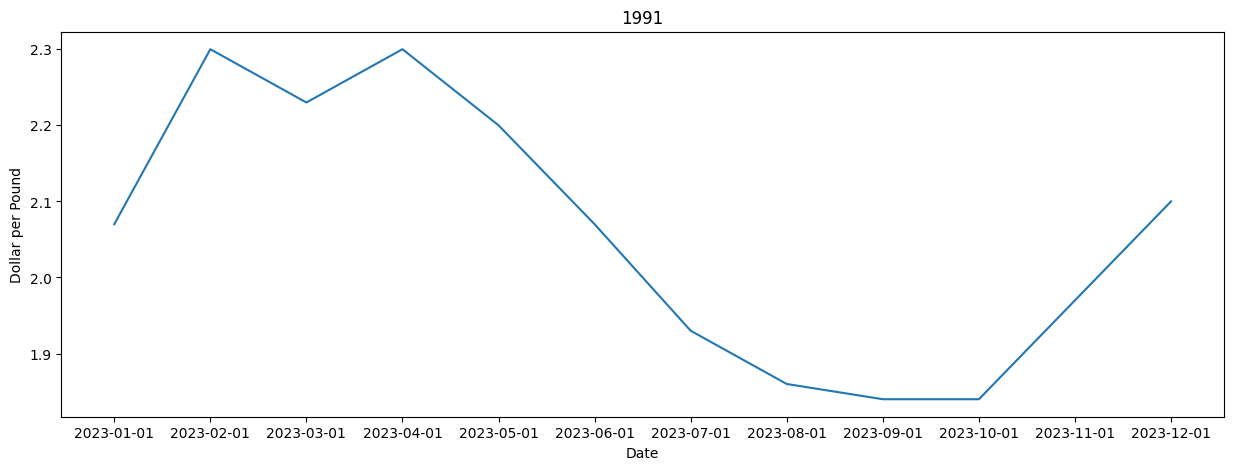

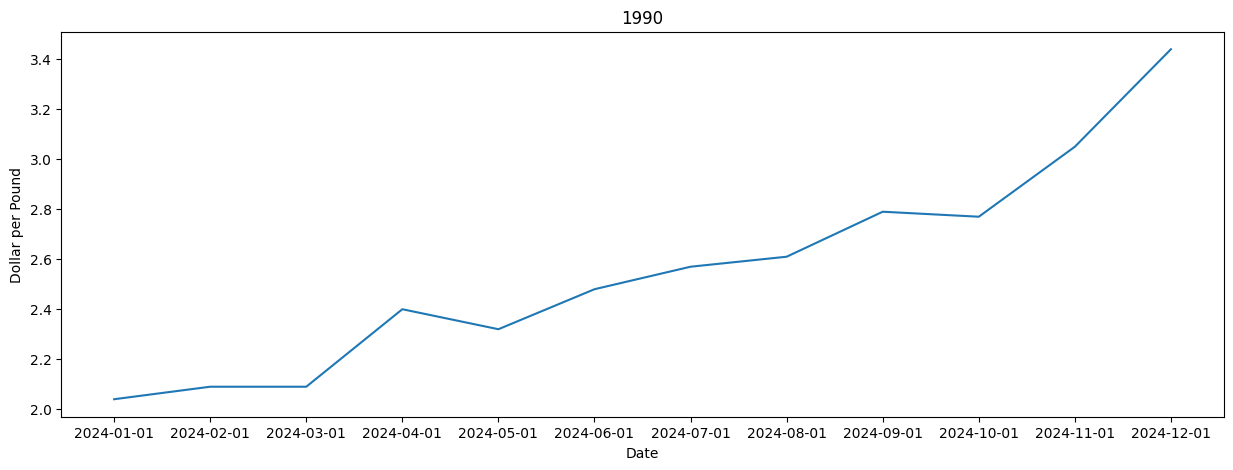

In [ ]:
# Plot the price of coffee for each year

a = 0
years = list(range(2024, 1989, -1))

for i in range(int(df_yearly)):
    data = df[a:a + 12]
    plt.figure(figsize=(15,5))
    plt.plot(data['date'], data['new_values'])
    plt.xlabel('Date')
    plt.ylabel('Dollar per Pound')
    plt.title(f'{years[i]}')
    a += 12

    plt.show()


In [ ]:
# Plot the price of coffee for each year on the same plot

a = 0
# years = list(range(2024, 1989, -1))

for i in range(int(df_yearly)):
    data = df[a:a + 12]
    a += 12

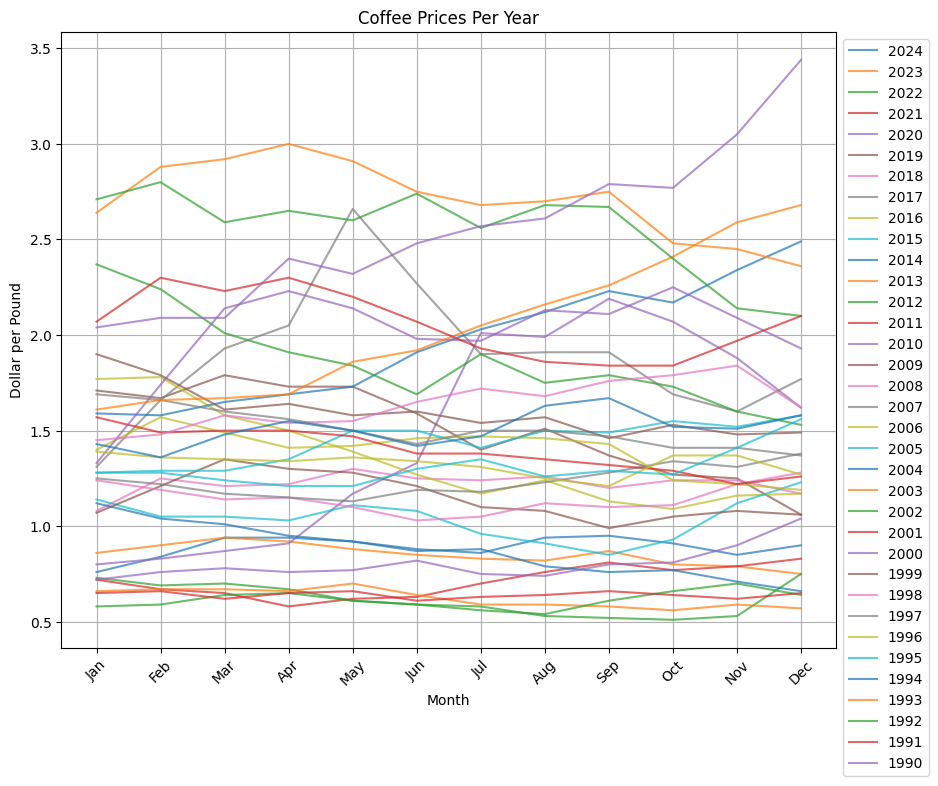

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

a = 0
years = list(range(2024, 1989, -1))

plt.figure(figsize=(10, 8))  # Create a single figure

for i in range(int(df_yearly)):
    data = df[a:a + 12].copy()  # Select 12 months of data
    data['month'] = pd.to_datetime(data['date']).dt.strftime('%b')  # Extract month name
    
    plt.plot(data['month'], data['new_values'], label=f'{years[i]}', alpha=0.7)  # Plot with transparency
    a += 12

plt.xlabel('Month')
plt.ylabel('Dollar per Pound')
plt.title('Coffee Prices Per Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True)  # Add grid for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

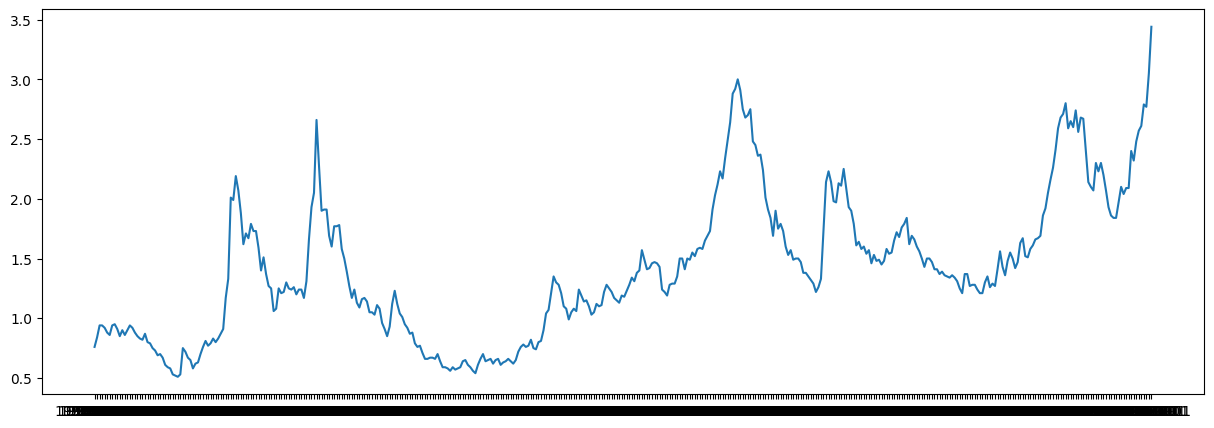

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['date'], df['new_values'])
plt.show

In [ ]:
# Checking for missing values

df.isnull().sum()

date          0
new_values    0
dtype: int64

## Data Preprocessing

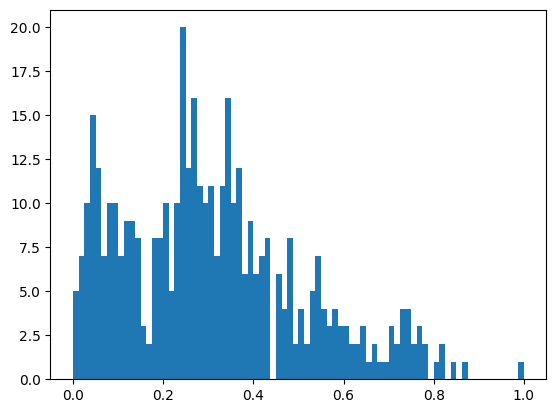

In [ ]:
# Normalization: Applying Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_values_scaled = scaler.fit_transform(df['new_values'].values.reshape(-1, 1))
plt.hist(df_values_scaled, bins = 80)
plt.show()

LSTM models take sequential input data in the form of a 3D array: (samples, timestamps, features)
- Samples: # of training examples (# of available sequences in the dataset)
- Timestamps: # of previous time steps useed to predict the next value
- Features: # of input features at each timestep


In [21]:
df_values_scaled.shape

(420, 1)

In [ ]:
# Creating Sequences
# Choose a sequence length. This means that, for every example, the model will look at the last T days of data to make a prediction

seq_length = 10   # Timestamps
X = []
y = []

for i in range(seq_length, len(df_values_scaled)):
    X.append(df_values_scaled[i-seq_length:i, 0])   # Extract past sequence
    y.append(df_values_scaled[i, 0])   # Next value

X = np.array(X)
y = np.array(y)

print('X shape: ', X.shape)
print('y shape: ', y.shape)



X shape:  (410, 10)
y shape:  (410,)


In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

SEED = 2
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, shuffle=False)

# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

print('X_train Shape: ', X_train.shape)
print('X_test Shape: ', X_test.shape)
print('y_train Shape: ', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape:  (328, 10)
X_test Shape:  (82, 10)
y_train Shape:  (328,)
y_test Shape: (82,)


In [ ]:
# Reshape training and testing data into 3D format, required by LSTM layers
# (samples, time steps, features)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("New X_train shape: ", X_train.shape)
print("New X_test shape: ", X_test.shape)

New X_train shape:  (328, 10, 1)
New X_test shape:  (82, 10, 1)


# Building LSTM Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential([
    LSTM(units=150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),   # Prevent overfitting
    BatchNormalization(),   # Stabilizes the learning process
    LSTM(units=75, activation='relu', return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(units=75, activation='relu', return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(units=50, activation='relu', return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(units=25, activation='relu'),   # Fully connected layer
    Dense(1),   # Output regression layer
])
# Compile model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()


C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 150)        │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 150)        │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 75)         │        67,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 75)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 75)         │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10, 75)         │        45,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 75)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 75)         │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,201 (907.04 KB)

 Trainable params: 231,501 (904.30 KB)

 Non-trainable params: 700 (2.73 KB)

return_sequences=False in the last LSTM layer to ensure model predicts only one output per sequence. This is to ensure that y_pred shape is consistent with X_test shape

In [ ]:
# Train the model and store the training and validation losses in two separate variables for graphing

history = model.fit(X_train, y_train, epochs=200, batch_size=41, validation_split=0.2)



Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 0.5907 - root_mean_squared_error: 0.7682 - val_loss: 0.1189 - val_root_mean_squared_error: 0.3448
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3765 - root_mean_squared_error: 0.6121 - val_loss: 0.1042 - val_root_mean_squared_error: 0.3228
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3255 - root_mean_squared_error: 0.5683 - val_loss: 0.0965 - val_root_mean_squared_error: 0.3106
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3260 - root_mean_squared_error: 0.5696 - val_loss: 0.0916 - val_root_mean_squared_error: 0.3027
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2234 - root_mean_squared_error: 0.4723 - val_loss: 0.0831 - val_root_mean_squared_error: 0.2883
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1869 - root_mean_squared_error: 0.4297 - val_loss: 0.0793 - val_root_mean_squared_error: 0.2816
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.123

- One epoch: one forward pass and one backward pass of all the training examples.
- Batch size: the number of training examples in one forward/backward pass. Higher batch, higher memory needed.
- Num. of iterations: Num. of passes, each pass using [batch size] number of examples.

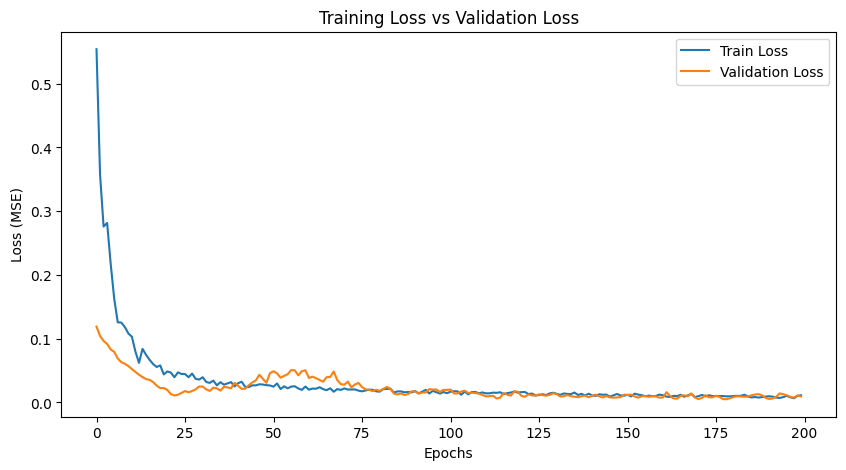

In [ ]:
# Plot train loss and validation loss

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss vs Validation Loss')
plt.show()

In [ ]:
# Evaluate model on test data

test_loss = model.evaluate(X_test, y_test)

print('test loss: ', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0077 - root_mean_squared_error: 0.0852
test loss:  [0.010453938506543636, 0.10224450379610062]


In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Reshape y_pred and y_test from 3D to 1D
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print('Mean Absolute Error: ', mae)
print('Root Mean Squared Error: ', rmse)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step
Mean Absolute Error:  0.08330119161505412
Root Mean Squared Error:  0.1022445053436819


1. Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their directions.
2. Root Mean Squared Error (RMSE): The square root of the average of the squared differences between prediction and actual observation.

Both MAE and RMSE are measures of prediction accuracy for a regression model.

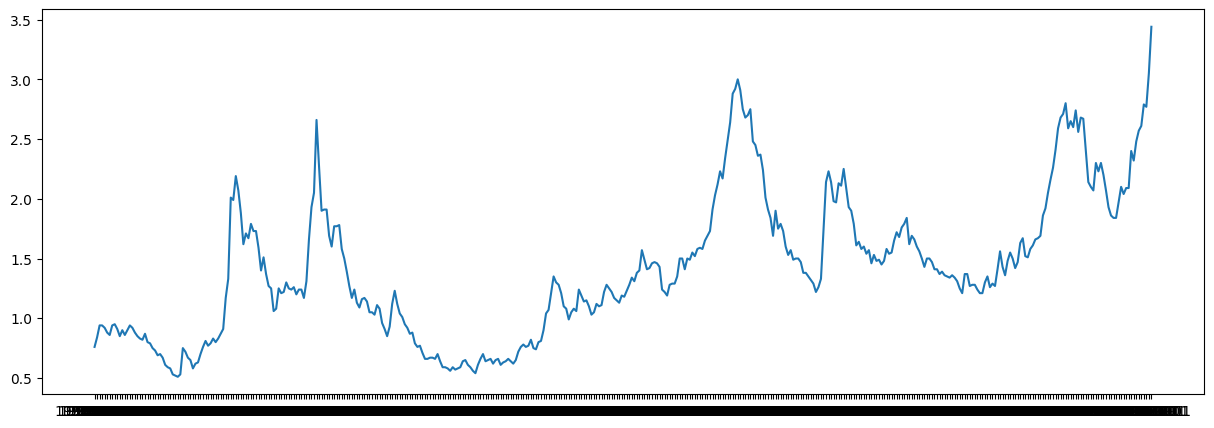

In [ ]:
plt.figure(figsize=(15,5))
values_unscaled = scaler.inverse_transform(df_values_scaled)
plt.plot(df['date'], values_unscaled)
plt.show()

In [ ]:
# Defining function to inverse transform the data to its unscaled state

def min_max_inv(value, scaler):
    inv = value*(scaler.data_max_-scaler.data_min_)+scaler.data_min_
    return inv

In [ ]:
y_test_unscaled = min_max_inv(y_test, scaler)
y_pred_unscaled = min_max_inv(y_pred, scaler)
X_test_unscaled = min_max_inv(X_test, scaler)

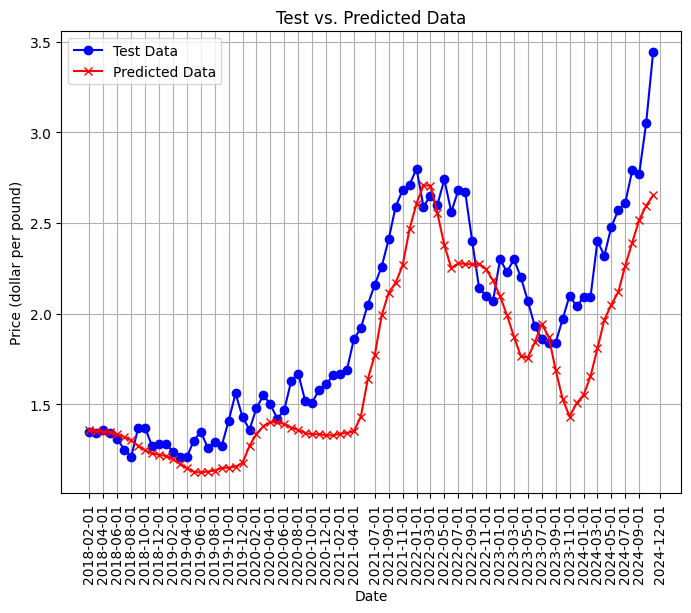

In [ ]:
# Plotting the test and predicted data

dates_array = df['date'].iloc[337:419]
indices = np.linspace(337, 419, 41, dtype = int)
spaced_dates = df['date'].iloc[indices]

plt.figure(figsize=(8, 6))
plt.plot(y_test_unscaled, marker='o', label='Test Data', color='blue')
plt.plot(y_pred_unscaled, marker='x', label='Predicted Data', color='red')
plt.xticks(indices - 337, spaced_dates.values, rotation = 90)

plt.xlabel('Date')
plt.ylabel('Price (dollar per pound)')
plt.title('Test vs. Predicted Data')
plt.legend() 
plt.grid(True)
plt.show()